In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SkLogReg
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-6):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            linear_output = X @ self.weights + self.bias
            y_pred = self.sigmoid(linear_output)

            error = y_pred - y
            dw = (1/n_samples) * X.T @ error
            db = (1/n_samples) * np.sum(error)

            new_weights = self.weights - self.learning_rate * dw
            new_bias = self.bias - self.learning_rate * db

            if np.all(np.abs(new_weights - self.weights) < self.tol) and abs(new_bias - self.bias) < self.tol:
                break

            self.weights = new_weights
            self.bias = new_bias

    def predict_proba(self, X):
        linear_output = X @ self.weights + self.bias
        return self.sigmoid(linear_output)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

In [9]:
# Пример с простыми данными
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Генерация данных
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LogisticRegressionGD(learning_rate=0.1, max_iter=10000)
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Оценка
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [12]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, random_state=42)

# --- Делим данные ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Обучение своих моделей ---
my_model = LogisticRegressionGD(learning_rate=0.1, max_iter=10000)
my_model.fit(X_train, y_train)
y_pred_my = my_model.predict(X_test)

# --- sklearn модель ---
sk_model = SkLogReg()
sk_model.fit(X_train, y_train)
y_pred_sk = sk_model.predict(X_test)

# --- Метрики ---
def show_metrics(name, y_true, y_pred):
    print(f"{name}:\n"
          f"  Accuracy : {accuracy_score(y_true, y_pred):.3f}\n"
          f"  Precision: {precision_score(y_true, y_pred):.3f}\n"
          f"  Recall   : {recall_score(y_true, y_pred):.3f}\n"
          f"  F1 Score : {f1_score(y_true, y_pred):.3f}\n")

show_metrics("Custom Logistic Regression", y_test, y_pred_my)
show_metrics("sklearn Logistic Regression", y_test, y_pred_sk)

Custom Logistic Regression:
  Accuracy : 0.875
  Precision: 0.773
  Recall   : 1.000
  F1 Score : 0.872

sklearn Logistic Regression:
  Accuracy : 0.875
  Precision: 0.773
  Recall   : 1.000
  F1 Score : 0.872



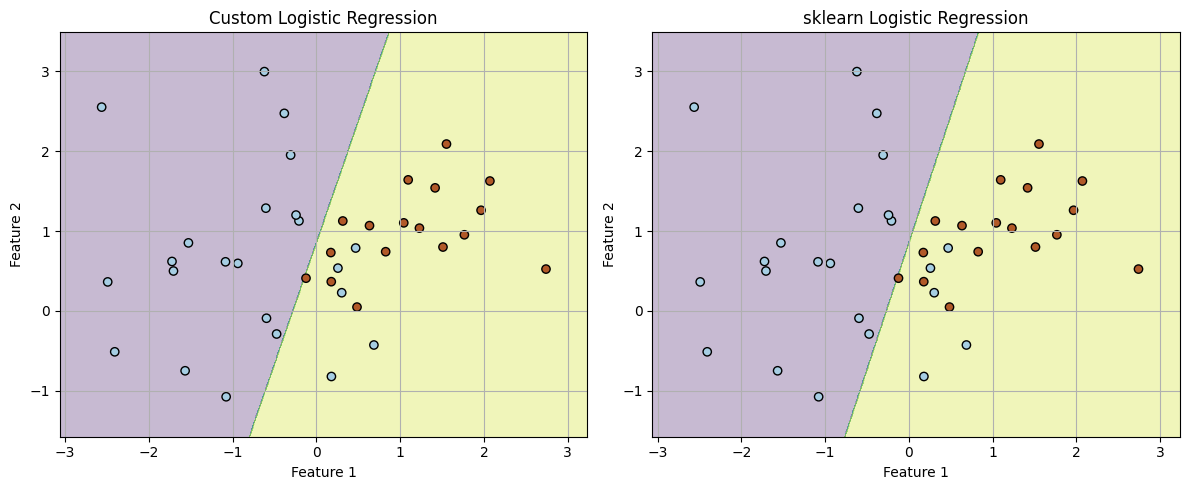

In [13]:
def plot_decision_boundary(model, X, y, title, is_custom=False):
    h = 0.01
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    if is_custom:
        Z = model.predict(grid)
    else:
        Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(my_model, X_test, y_test, "Custom Logistic Regression", is_custom=True)

plt.subplot(1, 2, 2)
plot_decision_boundary(sk_model, X_test, y_test, "sklearn Logistic Regression")

plt.tight_layout()
plt.show()

## Добавим L2-регуляризацию

In [14]:
class LogisticRegressionL2GD:
    def __init__(self, learning_rate=0.01, max_iter=1000, tolerance=1e-6, l2_lambda=1.0):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.l2_lambda = l2_lambda

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            linear_output = X @ self.weights + self.bias
            y_pred = self.sigmoid(linear_output)

            error = y_pred - y
            dw = (1 / n_samples) * X.T @ error + (self.l2_lambda / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(error)

            new_weights = self.weights - self.learning_rate * dw
            new_bias = self.bias - self.learning_rate * db

            if np.all(np.abs(new_weights - self.weights) < self.tolerance) and abs(new_bias - self.bias) < self.tolerance:
                break

            self.weights = new_weights
            self.bias = new_bias

    def predict_proba(self, X):
        return self.sigmoid(X @ self.weights + self.bias)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


# Мультиклассовая логистическая регрессия

### 1)One-vs-All (OvA, One-vs-Rest)
Обучаем K моделей (по 1 для каждого класса)

Каждая: "этот класс против всех остальных"

При предсказании: выбираем класс с наибольшей вероятностью

### 2)One-vs-One (OvO, All-vs-All)
Обучаем K(K−1)/2 моделей, по 1 для каждой пары классов.

Предсказание — голосование между моделями

Тяжелее, но иногда работает лучше

In [15]:
class MulticlassLogisticRegressionOVA:
    def __init__(self, learning_rate=0.1, max_iter=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.models = []
        self.classes = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_samples, n_features = X.shape
        self.models = []

        for cls in self.classes:
            y_binary = (y == cls).astype(int)
            weights = np.zeros(n_features)
            bias = 0

            for _ in range(self.max_iter):
                linear_output = X @ weights + bias
                y_pred = self.sigmoid(linear_output)

                error = y_pred - y_binary
                dw = (1 / n_samples) * X.T @ error
                db = (1 / n_samples) * np.sum(error)

                new_weights = weights - self.learning_rate * dw
                new_bias = bias - self.learning_rate * db

                if np.all(np.abs(new_weights - weights) < self.tolerance) and abs(new_bias - bias) < self.tolerance:
                    break

                weights = new_weights
                bias = new_bias

            self.models.append((weights, bias))

    def predict_proba(self, X):
        probs = []
        for weights, bias in self.models:
            probs.append(self.sigmoid(X @ weights + bias))
        return np.vstack(probs).T  # shape (n_samples, n_classes)

    def predict(self, X):
        probs = self.predict_proba(X)
        return self.classes[np.argmax(probs, axis=1)]


=== Твоя модель ===
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        27
           1       0.92      0.89      0.91        38
           2       1.00      0.84      0.91        25

    accuracy                           0.88        90
   macro avg       0.89      0.87      0.88        90
weighted avg       0.89      0.88      0.88        90

=== sklearn ===
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        27
           1       0.92      0.89      0.91        38
           2       1.00      0.84      0.91        25

    accuracy                           0.88        90
   macro avg       0.89      0.87      0.88        90
weighted avg       0.89      0.88      0.88        90



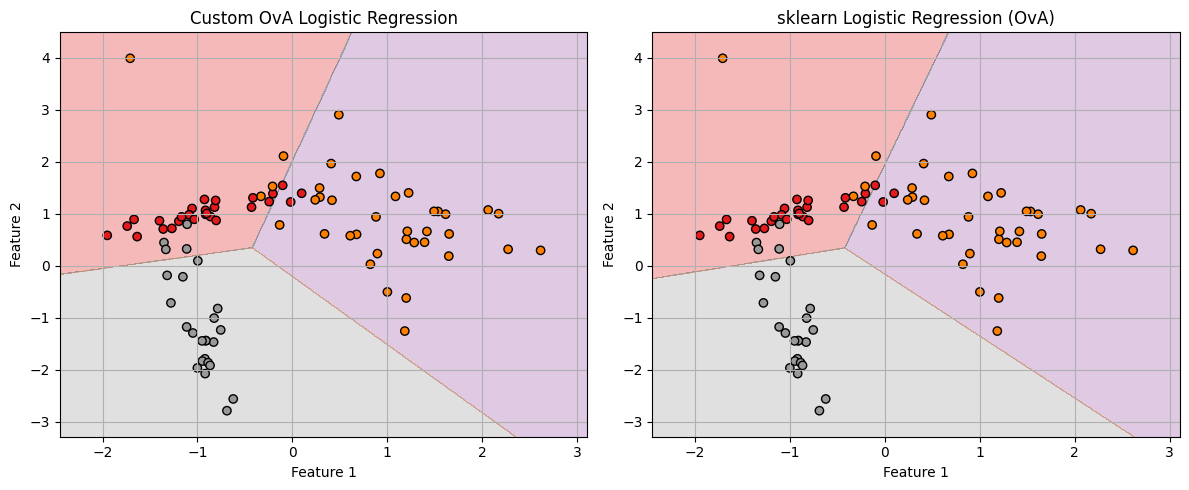

In [16]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression as SkLogReg
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# --- Данные: 3 класса ---
X, y = make_classification(n_samples=300, n_features=2, n_classes=3, 
                           n_redundant=0, n_informative=2, 
                           n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Твоя модель ---
my_ova = MulticlassLogisticRegressionOVA(learning_rate=0.1, max_iter=10000)
my_ova.fit(X_train, y_train)
y_pred_my = my_ova.predict(X_test)

# --- Sklearn модель ---
sk_model = SkLogReg(multi_class='ovr', solver='lbfgs', max_iter=10000)
sk_model.fit(X_train, y_train)
y_pred_sk = sk_model.predict(X_test)

# --- Метрики ---
print("=== Твоя модель ===")
print(classification_report(y_test, y_pred_my))

print("=== sklearn ===")
print(classification_report(y_test, y_pred_sk))

# --- Визуализация ---
def plot_multiclass_boundary(model, X, y, title, is_custom=True):
    h = 0.01
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_multiclass_boundary(my_ova, X_test, y_test, "Custom OvA Logistic Regression")

plt.subplot(1, 2, 2)
plot_multiclass_boundary(sk_model, X_test, y_test, "sklearn Logistic Regression (OvA)", is_custom=False)

plt.tight_layout()
plt.show()
